In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Import data
path = '/Users/thainam/Documents/GitHub/grey-model/data/data_render/nCoV_data_render.csv'
data = pd.read_csv(path)
data["Date"] = pd.to_datetime(data["Date"])
index_data = data.set_index(["Date"], drop=True)

# Check data
index_data.head(20)

,Total cases
Date,
2020-01-28,6061
2020-01-29,7816
2020-01-30,9821
2020-01-31,11948
2020-02-01,14551
2020-02-02,17387
2020-02-03,20047
2020-02-04,24553
2020-02-05,28276


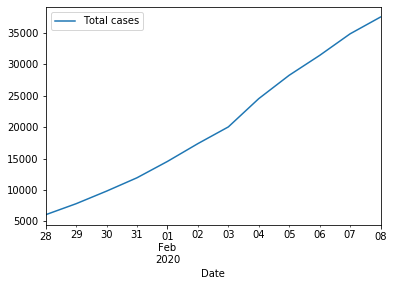

In [3]:
df = index_data[["Total cases"]]
df.plot()

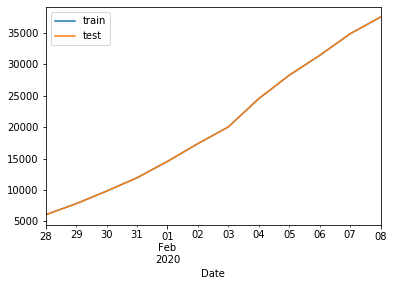

In [4]:
# Split data
split_date = pd.Timestamp('2020-02-08')
split_date2 = pd.Timestamp('2020-01-28')

train = df.loc[:split_date]
test = df.loc[split_date2:]

# Plot splitted data
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [5]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
train_scale = scale.fit_transform(train)
test_scale = scale.transform(test)

In [6]:
# Long Short-term Memory

# Split data into x (train,test) and y (train,test)
X_train = train_scale[:-1]
y_train = train_scale[1:]

X_test = test_scale[:-1]
y_test = test_scale[1:]

In [7]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [8]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM

K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(15, input_shape = (1, X_train.shape[1]), activation = 'relu', kernel_initializer= 'lecun_uniform', return_sequences = False))
model_lstm.add(Dense(1))
model_lstm.compile(loss = 'mean_squared_error', optimizer = 'adam')
early_stop = EarlyStopping(monitor = 'loss', patience = 15, verbose = 1)
history = model_lstm.fit(X_tr_t, y_train, epochs = 300, validation_data=(X_tst_t, y_test), batch_size = 1, verbose = 1, shuffle = False, callbacks = [early_stop])

Using TensorFlow backend.


Train on 11 samples, validate on 11 samples
Epoch 1/300
11/11 [==============================] - 0s 35ms/step - loss: 0.1391 - val_loss: 0.1315
Epoch 2/300
11/11 [==============================] - 0s 2ms/step - loss: 0.1189 - val_loss: 0.1123
Epoch 3/300
11/11 [==============================] - 0s 2ms/step - loss: 0.1007 - val_loss: 0.0949
Epoch 4/300
11/11 [==============================] - 0s 2ms/step - loss: 0.0845 - val_loss: 0.0795
Epoch 5/300
11/11 [==============================] - 0s 2ms/step - loss: 0.0703 - val_loss: 0.0662
Epoch 6/300
11/11 [==============================] - 0s 2ms/step - loss: 0.0581 - val_loss: 0.0547
Epoch 7/300
11/11 [==============================] - 0s 2ms/step - loss: 0.0477 - val_loss: 0.0450
Epoch 8/300
11/11 [==============================] - 0s 2ms/step - loss: 0.0391 - val_loss: 0.0369
Epoch 9/300
11/11 [==============================] - 0s 2ms/step - loss: 0.0319 - val_loss: 0.0303
Epoch 10/300
11/11 [==============================] - 0s 2ms/ste

11/11 [==============================] - 0s 2ms/step - loss: 4.1492e-04 - val_loss: 4.0358e-04
Epoch 81/300
11/11 [==============================] - 0s 2ms/step - loss: 4.1059e-04 - val_loss: 3.9949e-04
Epoch 82/300
11/11 [==============================] - 0s 2ms/step - loss: 4.0653e-04 - val_loss: 3.9565e-04
Epoch 83/300
11/11 [==============================] - 0s 2ms/step - loss: 4.0272e-04 - val_loss: 3.9203e-04
Epoch 84/300
11/11 [==============================] - 0s 2ms/step - loss: 3.9912e-04 - val_loss: 3.8861e-04
Epoch 85/300
11/11 [==============================] - 0s 2ms/step - loss: 3.9571e-04 - val_loss: 3.8537e-04
Epoch 86/300
11/11 [==============================] - 0s 2ms/step - loss: 3.9248e-04 - val_loss: 3.8229e-04
Epoch 87/300
11/11 [==============================] - 0s 1ms/step - loss: 3.8942e-04 - val_loss: 3.7935e-04
Epoch 88/300
11/11 [==============================] - 0s 2ms/step - loss: 3.8649e-04 - val_loss: 3.7655e-04
Epoch 89/300
11/11 [=====================

11/11 [==============================] - 0s 2ms/step - loss: 2.7164e-04 - val_loss: 2.6342e-04
Epoch 156/300
11/11 [==============================] - 0s 2ms/step - loss: 2.7019e-04 - val_loss: 2.6215e-04
Epoch 157/300
11/11 [==============================] - 0s 2ms/step - loss: 2.6893e-04 - val_loss: 2.6089e-04
Epoch 158/300
11/11 [==============================] - 0s 2ms/step - loss: 2.6767e-04 - val_loss: 2.5959e-04
Epoch 159/300
11/11 [==============================] - 0s 2ms/step - loss: 2.6629e-04 - val_loss: 2.5839e-04
Epoch 160/300
11/11 [==============================] - 0s 2ms/step - loss: 2.6519e-04 - val_loss: 2.5710e-04
Epoch 161/300
11/11 [==============================] - 0s 2ms/step - loss: 2.6380e-04 - val_loss: 2.5588e-04
Epoch 162/300
11/11 [==============================] - 0s 2ms/step - loss: 2.6266e-04 - val_loss: 2.5467e-04
Epoch 163/300
11/11 [==============================] - 0s 2ms/step - loss: 2.6133e-04 - val_loss: 2.5347e-04
Epoch 164/300
11/11 [============

11/11 [==============================] - 0s 2ms/step - loss: 2.0231e-04 - val_loss: 1.9630e-04
Epoch 231/300
11/11 [==============================] - 0s 2ms/step - loss: 2.0174e-04 - val_loss: 1.9575e-04
Epoch 232/300
11/11 [==============================] - 0s 2ms/step - loss: 2.0117e-04 - val_loss: 1.9520e-04
Epoch 233/300
11/11 [==============================] - 0s 2ms/step - loss: 2.0062e-04 - val_loss: 1.9467e-04
Epoch 234/300
11/11 [==============================] - 0s 2ms/step - loss: 2.0007e-04 - val_loss: 1.9414e-04
Epoch 235/300
11/11 [==============================] - 0s 2ms/step - loss: 1.9953e-04 - val_loss: 1.9362e-04
Epoch 236/300
11/11 [==============================] - 0s 2ms/step - loss: 1.9899e-04 - val_loss: 1.9311e-04
Epoch 237/300
11/11 [==============================] - 0s 2ms/step - loss: 1.9846e-04 - val_loss: 1.9260e-04
Epoch 238/300
11/11 [==============================] - 0s 2ms/step - loss: 1.9794e-04 - val_loss: 1.9210e-04
Epoch 239/300
11/11 [============

In [9]:
# Prediction
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)

In [10]:
model_lstm.save('LSTM_nCoV.h5')

In [11]:
model_lstm = load_model('LSTM_nCoV.h5')
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

In [12]:
# R2 score
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

# MAPE
def MAPE(y, y_pred):
    y, y_pred = np.array(y), np.array(y_pred)
    return (np.mean(np.abs((y - y_pred) / y)) * 100) 

In [13]:
# Save data
col1 = pd.DataFrame(y_test, columns=['True'])
col2 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM Prediction'])
col3 = pd.DataFrame(history.history['loss'], columns=['Loss_LSTM'])

results = pd.concat([col1, col2, col3], axis=1)
results.to_csv('LSTM_abc.csv')

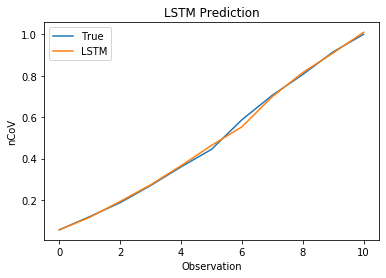

11/11 [==============================] - 0s 5ms/step
LSTM: 0.000171
The R2 score on the Train set is:	0.998261225
The Adjusted R2 score on the Train set is:	0.998068027

The R2 score on the Test set is:	0.998261225
The Adjusted R2 score on the Test set is:	0.998068027
MAPE score is: 2.119533192501333


In [14]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Graphing
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM Prediction")
plt.xlabel('Observation')
plt.ylabel('nCoV')
plt.legend()
plt.show()

# Scoring
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)
print('LSTM: %f'%score_lstm)

# R2 Scores
print("The R2 score on the Train set is:\t{:0.9f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.9f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.9f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.9f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

# MAPE Score
print("MAPE score is: " + str(MAPE(y_test, y_pred_test_LSTM)))

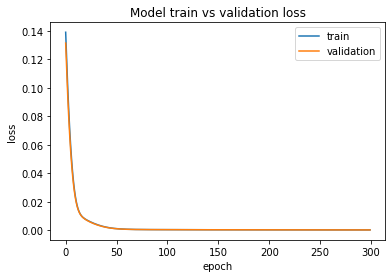

In [15]:
# Graphing loss vs validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()